In [1]:
from pathlib import Path
import numpy as np
import torch

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# base_folder = Path("/home/smehta/Projects/Matcha-TTS/temp_duration_plots")

# base_folder = Path("/home/smehta/Projects/BetterFastSpeech2/Interspeech2024/temp_duration_plots")

# base_folder = Path("/home/smehta/Projects/vits/Interspeech2024/temp_duration_plots")

In [4]:
def quantisation_residue(x):
    if isinstance(x, np.ndarray):
        x = torch.from_numpy(x)
    return torch.sum(torch.abs(x - torch.round(x).int())).item(), x.squeeze().shape[0]

def quantisation_residue_list(x, return_type="avg"):
    lens, sum_list = [], []
    for y in x:
        # print(y)
        s_, l_ = quantisation_residue(y)
        lens.append(l_)
        sum_list.append(s_)
    if return_type == "sum":
        return sum(sum_list)
    elif return_type == "avg":
        return sum(sum_list) / sum(lens)
    else:
        return sum_list

In [8]:
def get_for_each_architecture(path):

    base_folder = Path(path)

    values = {}
    for file in base_folder.glob('*.pt'):
        if file.is_file():
            values[file.stem] = quantisation_residue_list(torch.load(file))
    
    TSGD2 = [v for _, v in sorted({int(k.split("_")[1]): v for k, v in values.items() if "TSGD2_" in k}.items())]
    TSGD2_det = [values["det_TSGD2"] for _ in range(len(TSGD2))]
    ConvS = [v for _, v in sorted({int(k.split("_")[1]): v for k, v in values.items() if "ConvS_" in k}.items())]
    ConvS_det = [values["det_ConvS"] for _ in range(len(ConvS))]
    RS = [v for _, v in sorted({int(k.split("_")[1]): v for k, v in values.items() if "RS_" in k}.items())]
    RS_det = [values["det_RS"] for _ in range(len(RS))]
    LJ = [v for _, v in sorted({int(k.split("_")[1]): v for k, v in values.items() if "LJ_" in k}.items())]
    LJ_det = [values["det_LJ"] for _ in range(len(LJ))]
    
    avg_fm = []
    for i in range(len(TSGD2)):
        avg_fm.append((TSGD2[i] + ConvS[i] + RS[i] + LJ[i]) / 4)
    
    avg_det = []
    for i in range(len(TSGD2)):
        avg_det.append((TSGD2_det[i] + ConvS_det[i] + RS_det[i] + LJ_det[i]) / 4)
        
    
    return avg_fm, avg_det, values
# base_folder = Path("/home/smehta/Projects/Matcha-TTS/temp_duration_plots")

# base_folder = Path("/home/smehta/Projects/BetterFastSpeech2/Interspeech2024/temp_duration_plots")

# base_folder = Path("/home/smehta/Projects/vits/Interspeech2024/temp_duration_plots")
matcha_fm, matcha_det, _ = get_for_each_architecture("/home/smehta/Projects/Matcha-TTS/temp_duration_plots")
FS2_fm, FS2_det, _ = get_for_each_architecture("/home/smehta/Projects/BetterFastSpeech2/Interspeech2024/temp_duration_plots")
vits_fm, vits_det, values = get_for_each_architecture("/home/smehta/Projects/vits/Interspeech2024/temp_duration_plots")

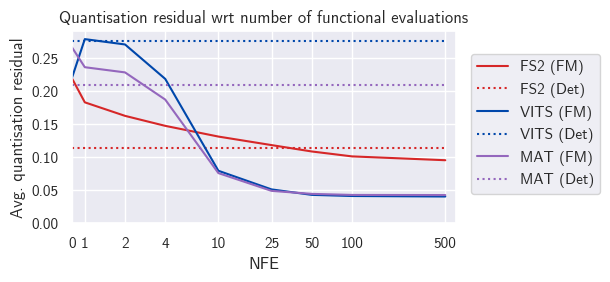

In [16]:
from whisperweranalysis.plotting.line import plot_lines
import matplotlib.pyplot as plt

x = [max(0.8, k) for k, _ in sorted({int(k.split("_")[1]): v for k, v in values.items() if "TSGD2_" in k}.items())]
y_values = [FS2_fm, FS2_det, vits_fm, vits_det, matcha_fm, matcha_det]
x_ticks = list(x)
x_tick_labels = ["0"] + list(map(str, x_ticks))[1:]
y_ticks = None # [1, 2, 3, 4, 5] #, 25, 50, 100]
y_tick_labels = None # list(map(str, y_ticks))
plot_colors = ['#d62728', '#d62728', '#0047AB', '#0047AB', '#9467bd', '#9467bd', '#2ca02c', '#2ca02c', '#8b0000', '#8c564b', '#17becf'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', ':', '-', ':', '-', ':' ,'-', ':'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'quantization.pdf'
plot_log_x = True
plot_log_y = False 
xlim = [0.8, 600] # (2, 10)
legend_labels = ["FS2 (FM)", "FS2 (Det)", "VITS (FM)", "VITS (Det)", "MAT (FM)", "MAT (Det)"]
# with plt.xkcd():
plot_lines([x, x, x, x, x, x], y_values, 
            x_label='NFE',
            y_label='Avg. quantisation residual',
            legend_label=legend_labels,
            line_format=line_format,
            plot_colors=plot_colors,
            aspect_ratio=aspect_ratio,
            x_ticks=x_ticks,
            x_tick_labels=x_tick_labels,
            y_ticks=y_ticks,
            y_tick_labels=y_tick_labels,
            file_name=output_filename,
            plot_log_x=plot_log_x,
            plot_log_y=plot_log_y,
            xlim=xlim,
#             title
    )

## Without 0

In [20]:
np.min([FS2_fm, FS2_det, vits_fm, vits_det, matcha_fm, matcha_det]), np.max([FS2_fm, FS2_det, vits_fm, vits_det, matcha_fm, matcha_det])

(0.040514489828211916, 0.27892279627384764)

/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:248: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim)


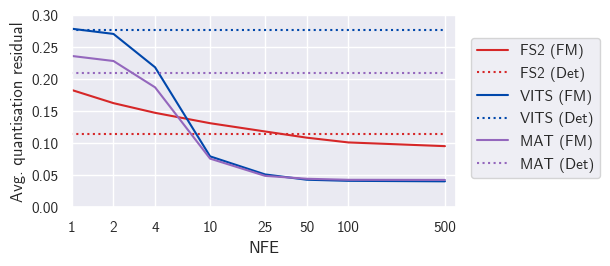

In [39]:
from whisperweranalysis.plotting.line import plot_lines
import matplotlib.pyplot as plt

x = [k for k, _ in sorted({int(k.split("_")[1]): v for k, v in values.items() if "TSGD2_" in k}.items())]
y_values = [FS2_fm, FS2_det, vits_fm, vits_det, matcha_fm, matcha_det]
x_ticks = list(x)
x_tick_labels = list(map(str, x_ticks))
y_ticks = np.linspace(0, 0.3, 7) # [1, 2, 3, 4, 5] #, 25, 50, 100]
y_tick_labels = list(map(lambda x: f"{x:.2f}", y_ticks))
plot_colors = ['#d62728', '#d62728', '#0047AB', '#0047AB', '#9467bd', '#9467bd', '#2ca02c', '#2ca02c', '#8b0000', '#8c564b', '#17becf'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', ':', '-', ':', '-', ':' ,'-', ':'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'quantization_without_0.pdf'
plot_log_x = True
plot_log_y = False 
xlim = [0, 600] # (2, 10)
legend_labels = ["FS2 (FM)", "FS2 (Det)", "VITS (FM)", "VITS (Det)", "MAT (FM)", "MAT (Det)"]
# with plt.xkcd():
plot_lines([x, x, x, x, x, x], y_values, 
            x_label='NFE',
            y_label='Avg. quantisation residual',
            legend_label=legend_labels,
            line_format=line_format,
            plot_colors=plot_colors,
            aspect_ratio=aspect_ratio,
            x_ticks=x_ticks,
            x_tick_labels=x_tick_labels,
            y_ticks=y_ticks,
            y_tick_labels=y_tick_labels,
            file_name=output_filename,
            plot_log_x=plot_log_x,
            plot_log_y=plot_log_y,
            xlim=xlim,
    )